# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

# FINAL PROJECT CODE & SUBMISSION CELLS BELOW THIS POINT

*Note for instructor: The next 3 cells are used to prepare the session, import the dataset, & perform some minor data manipulation before final projet visualizations. Data narrative & visualizations occurr after code block [3]!*

*Also, I interpreted the 'at least two but no more than three paragraphs...' to be 'paragraph' = Markdown Cell. Apologies if I went overboard on text.*

In [1]:
library('tidyverse')
library('ggrepel')
library('patchwork')
options(repr.plot.width = 5, repr.plot.height = 4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Import dataset to use
pokemon <- read.csv("https://raw.githubusercontent.com/lgreski/pokemonData/refs/heads/master/Pokemon.csv", header = TRUE)

# pokemon |> head()

In [3]:
# Assigning 'Weakness' & 'Resistance' scores conditioned on 'Type1' variable.
# For reference of score assignments, see:
# https://pokemondb.net/type

pokemon_scores <- pokemon |>
    select(ID, Name, Form, Type1, Generation) |>
    mutate(wkness = case_when(
            Type1 == "Bug" ~ 3,
            Type1 == "Dark" ~ 3,
            Type1 == "Dragon" ~ 3,
            Type1 == "Electric" ~ 1,
            Type1 == "Fairy" ~ 2,
            Type1 == "Fighting" ~ 3,
            Type1 == "Fire" ~ 3,
            Type1 == "Flying" ~ 3,
            Type1 == "Ghost" ~ 2, 
            Type1 == "Grass" ~ 5,
            Type1 == "Ground" ~ 3,
            Type1 == "Ice" ~ 4,
            Type1 == "Normal" ~ 1,
            Type1 == "Poison" ~ 2,
            Type1 == "Psychic" ~ 3,
            Type1 == "Rock" ~ 5,
            Type1 == "Steel" ~ 3,
            Type1 == "Water" ~ 2
            ),
           res = case_when(
            Type1 == "Bug" ~ 3,
            Type1 == "Dark" ~ 4,
            Type1 == "Dragon" ~ 4,
            Type1 == "Electric" ~ 3,
            Type1 == "Fairy" ~ 5,
            Type1 == "Fighting" ~ 3,
            Type1 == "Fire" ~ 6,
            Type1 == "Flying" ~ 5,
            Type1 == "Ghost" ~ 6, 
            Type1 == "Grass" ~ 4,
            Type1 == "Ground" ~ 4,
            Type1 == "Ice" ~ 2,
            Type1 == "Normal" ~ 2,
            Type1 == "Poison" ~ 5,
            Type1 == "Psychic" ~ 2,
            Type1 == "Rock" ~ 4,
            Type1 == "Steel" ~ 12,
            Type1 == "Water" ~ 4        
           ))

# pokemon_scores |> head()

### Introduction

To the average player, Pokemon is a casual role-playing game in which one is usually tasked with catching all different Pokemon species or becoming the top trainer through battling with those that they have captured. Most will complete the different games relatively easily with little regard to the underlying mechanisms that determine the final result of Pokemon battles. In truth, there is an incredible amount of mathematical consideration that goes into constructing a Pokemon team at the competitive levels against other human players. There are three primary, high-level considerations that go into selecting a Pokemon for your competitive team: their typing, their base stat total, and the list of moves that the Pokemon could potentially learn. A Pokemon's typing plays a large role in what moves will be available to them and what moves they are resistant to; for example, a 'Fire' type Pokemon will only take half damage from 'Grass' type attacks. At the same time, one needs to balance their spread of Pokemon typing on their team with Pokemon that are of the highest caliber of that typing, or in other words have the largest base stat total possible. This is a measure of how their stats are spread across 6 key aspects of battling (Defense, Speed, etc.), and typically those with a higher base total will have better battling results than those with a lower total. For example, if one needed a "Water" type Pokemon on their team, they may consider choosing Milotic with a base stat total of 540, over Seaking, who has a base stat total of 450. 

To summarize, a competitive Pokemon team should be primarily selected to have high base stat totals with a spread of typings that give the team resistance and adaptability. For our data exploration, we'll be taking a look at what might be considered the strongest pokemon types, and how these types and base stat totals differ over different "Generations" of Pokemon games. A generation is defined as a new mainline series Pokemon game that introduces a set of at least 100 new Pokemon, with some series - alterting mechanic. To date, there have been 9 Pokemon generations; the ultimate question being, which of the current 9 generations do we consider the strongest? 

For this analysis, the following assumptions/decisions have been made for the sake of simplicity & it should be understood that this highly skews the actual results of our question, and more consideration be taken into account for formal results:
1. All Pokemon in an evolution line are considered. That is, base stat totals & counts of primary type are likely inflated from what they would be if we considered only 'competitive' Pokemon. For example, one would only take the final Pokemon in the evoluation line, Charizard, for a competitive match; their early evolutions of Charmander & Charmeleon would never be considered.
2. Considering that there are 324 possible dual-typings, we limited our exploration to only the Pokemon's 'primary' type. This will highly skew type analyses. For example, if we consider a 'Bug' type Pokemon, typically they have 3 weaknesses. However, if we consider a 'Bug/Steel' Pokemon, this changes to a single weakness since the 'Steel' typing improves some resistances. 

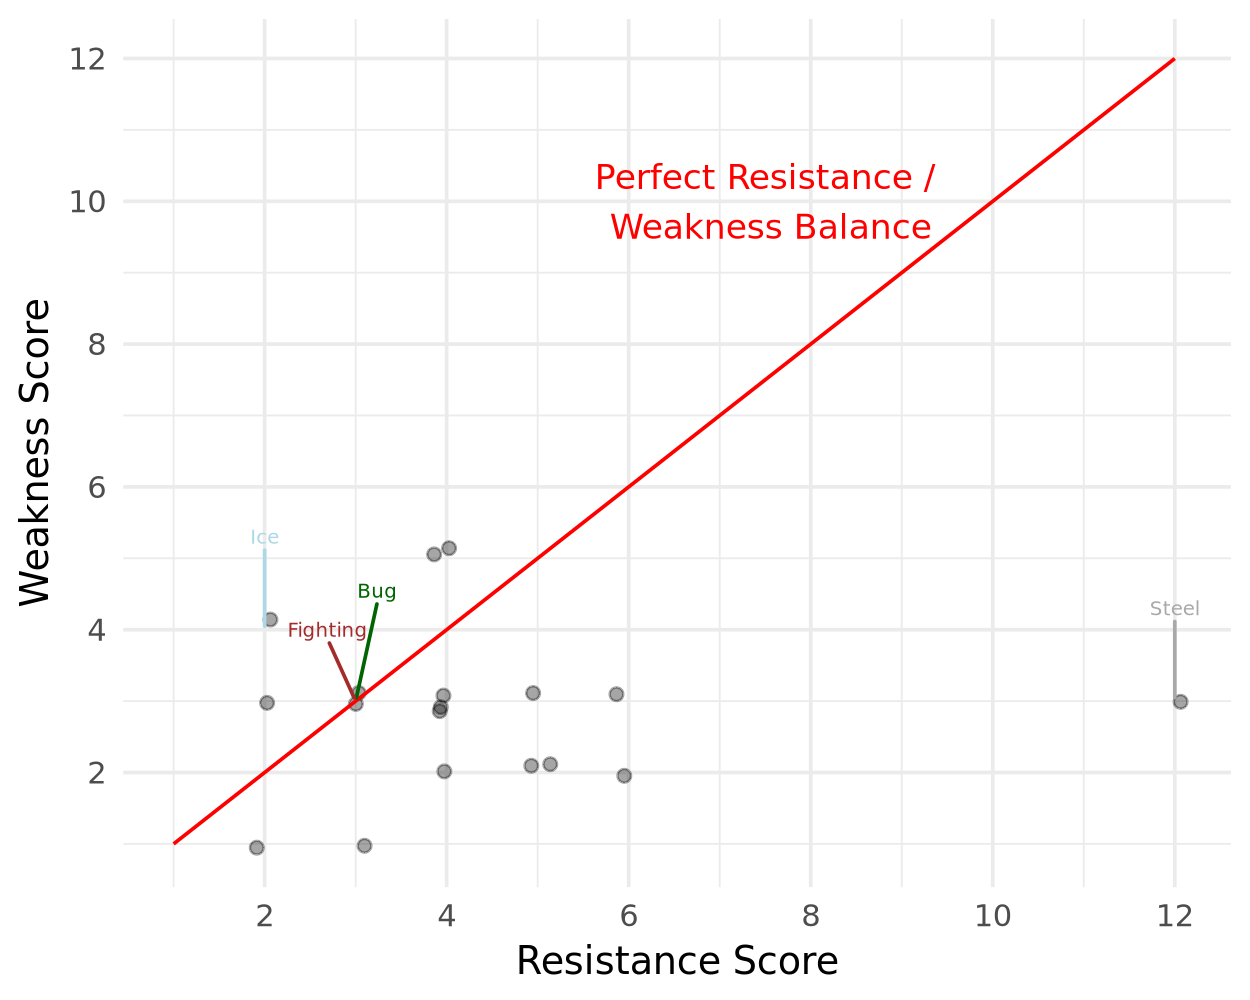

In [4]:
# Perfect Resistance = Weakness score line 
dummy <- data.frame(
    res = 1:12,
    wkness = 1:12)

# Collapse to only one obs per Type1; mean() will just be equal to assignments
vis1 <- pokemon_scores |> group_by(Type1) |> summarize(wkness = mean(wkness), res = mean(res))

# Compare types in a scatterplot of weakness by resistance scores 
ggplot(vis1, aes(x = res, y = wkness)) + 
    geom_point(position = position_jitter(width = 0.15, height = 0.15, seed = 1128), alpha = 0.35) + 
    geom_line(data = dummy, color = "red") + 
    theme_minimal() + 
    labs(x = "Resistance Score", y = "Weakness Score") + 
    scale_x_continuous(breaks = scales::breaks_pretty()) + 
    scale_y_continuous(breaks = scales::breaks_pretty()) + 
    annotate("text", x = 7.5, y = 10, label = "Perfect Resistance /\n Weakness Balance", color = "Red", size = 3.5) + 
    geom_text_repel(
        data = vis1 |> filter(Type1 %in% c('Steel', 'Ice', 'Bug', 'Fighting')),
        aes(label = Type1),
        color = c('darkgreen', 'brown', 'lightblue', 'darkgray'), 
        size = 2,
        nudge_y = 1.3
    )

`summarise()` has grouped output by 'Generation'. You can override using the
`.groups` argument.


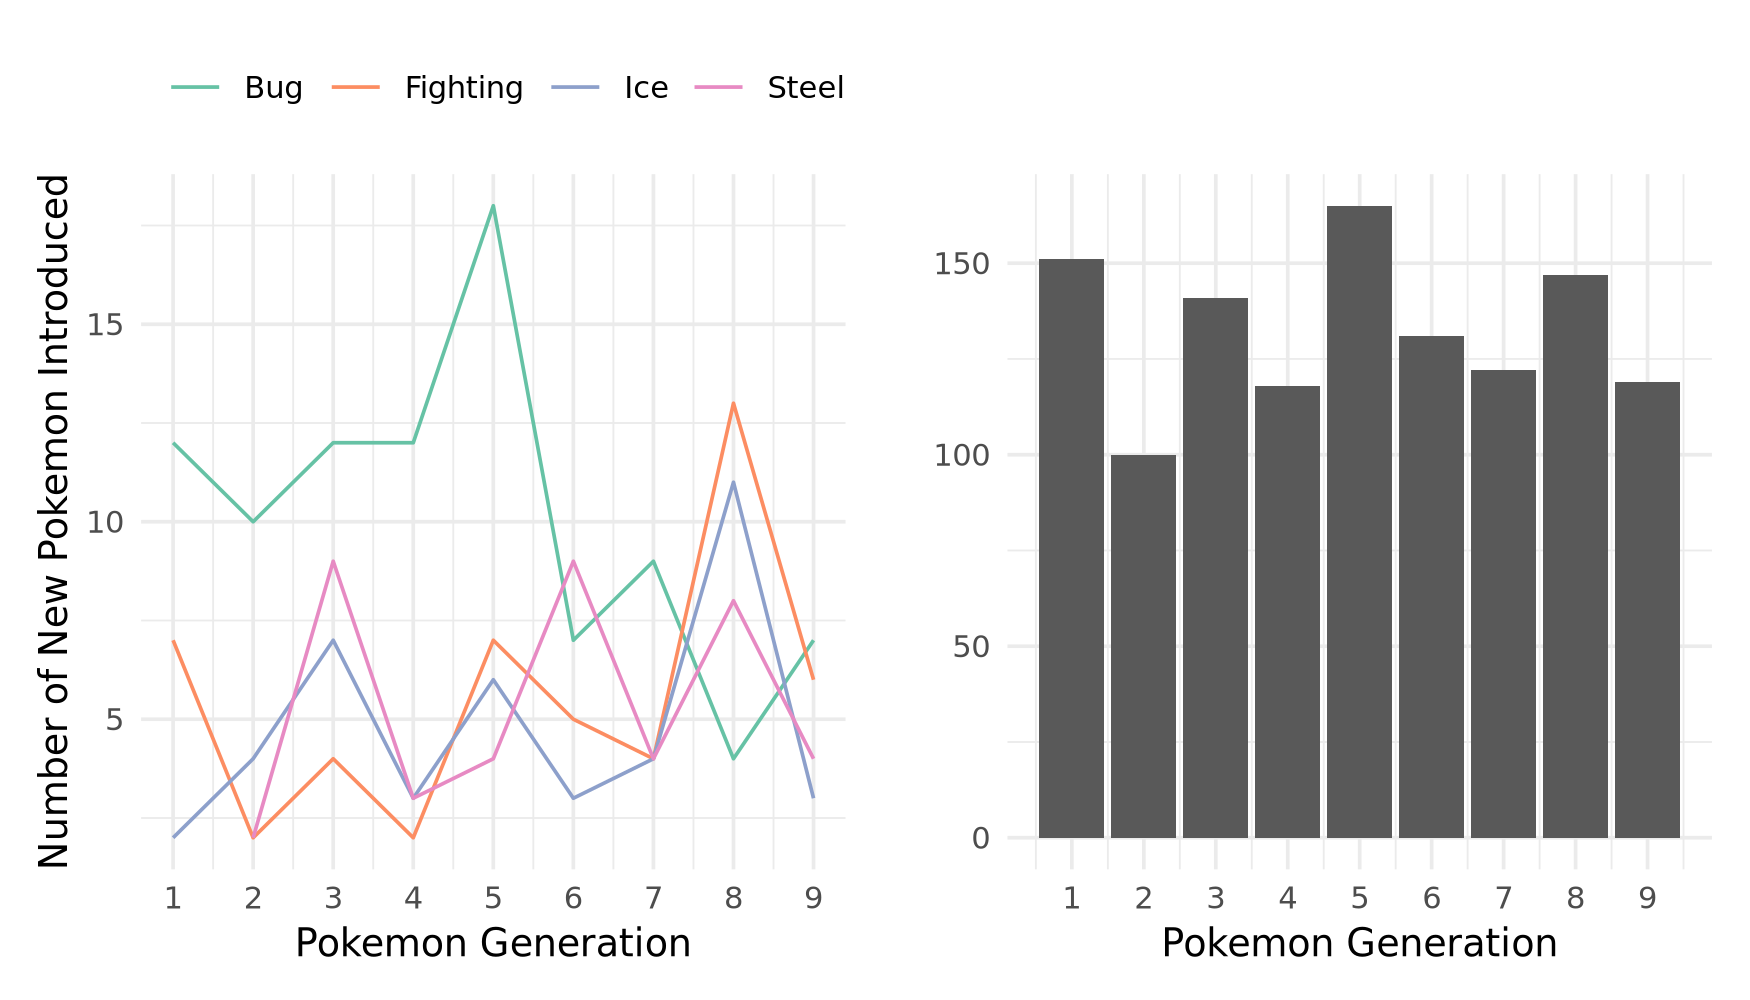

In [5]:
# Up plot options for patchwork display
options(repr.plot.width = 7)

# Store a plot with overall count of new pokemon per gen
gencounts <- ggplot(pokemon_scores, aes(x = Generation)) + 
                geom_bar() + 
                theme_minimal() + 
                scale_x_continuous(breaks = scales::breaks_pretty(n = 9)) + 
                labs(x = "Pokemon Generation", y = "") 

# Transform data to only summarize the 4 types of interest identified above, count per type per gen
vis2 <- pokemon_scores |>
    filter(Type1 %in% c('Steel', 'Ice', 'Bug', 'Fighting')) |>
    group_by(Generation, Type1) |>
    summarize(Count = n())

# Plot count per type per gen
typecounts <- ggplot(vis2, aes(x = Generation, y = Count, color = Type1)) + 
                geom_line() + 
                theme_minimal() + 
                scale_x_continuous(breaks = scales::breaks_pretty(n = 9)) + 
                theme(legend.position = "top") + 
                labs(x = "Pokemon Generation", y = "Number of New Pokemon Introduced", color = "") + 
                scale_color_brewer(palette = 'Set2')

# Combine overall & specific type additions for full narrative
typecounts + gencounts

### Type Findings

In the first visualization, we are exploring a plot of each of the 18 distinct Pokemon types comparing their 'weakness score' to their 'resistance score'. These scores were defined simply as a count of how many other types did double damage to the type in question, and a count of how many other types did half damage to the type in quesiton, respectively. For the 'resistance' score, if a type is completely unaffected by another (for example, 'Normal' takes no damage from 'Ghost'), they are given a +2 for that case instead of a +1. There are a couple of noticeable typings to mention here:
1. Ice, having the most weakness & least resistance.
2. Steel, having the least weakness & most resistance.
3. Bug & Fighting, which are aligned with "perfect" weakness/resistance agreement.

With these types of interest, we then explored the prevalence of these Pokemon appearing in new generations over time. An overall count of new Pokemon per generation is provided alongside this display to get a sense of when numbers may be inflated due to just total new Pokemon; for example, Generation 5 appears to be the largest new cast added, so the spike in new 'Bug' Pokemon for that generation may not be particularly remarkable. However, we may be most insterested in Generation 6 moving forward; this one appears to have the largest disparity in new 'Ice' (weakest) and new 'Steel' (strongest) Pokemon being added, so we may expect that Generation 6 could be a good selection for our determination of the strongest overall generation. 

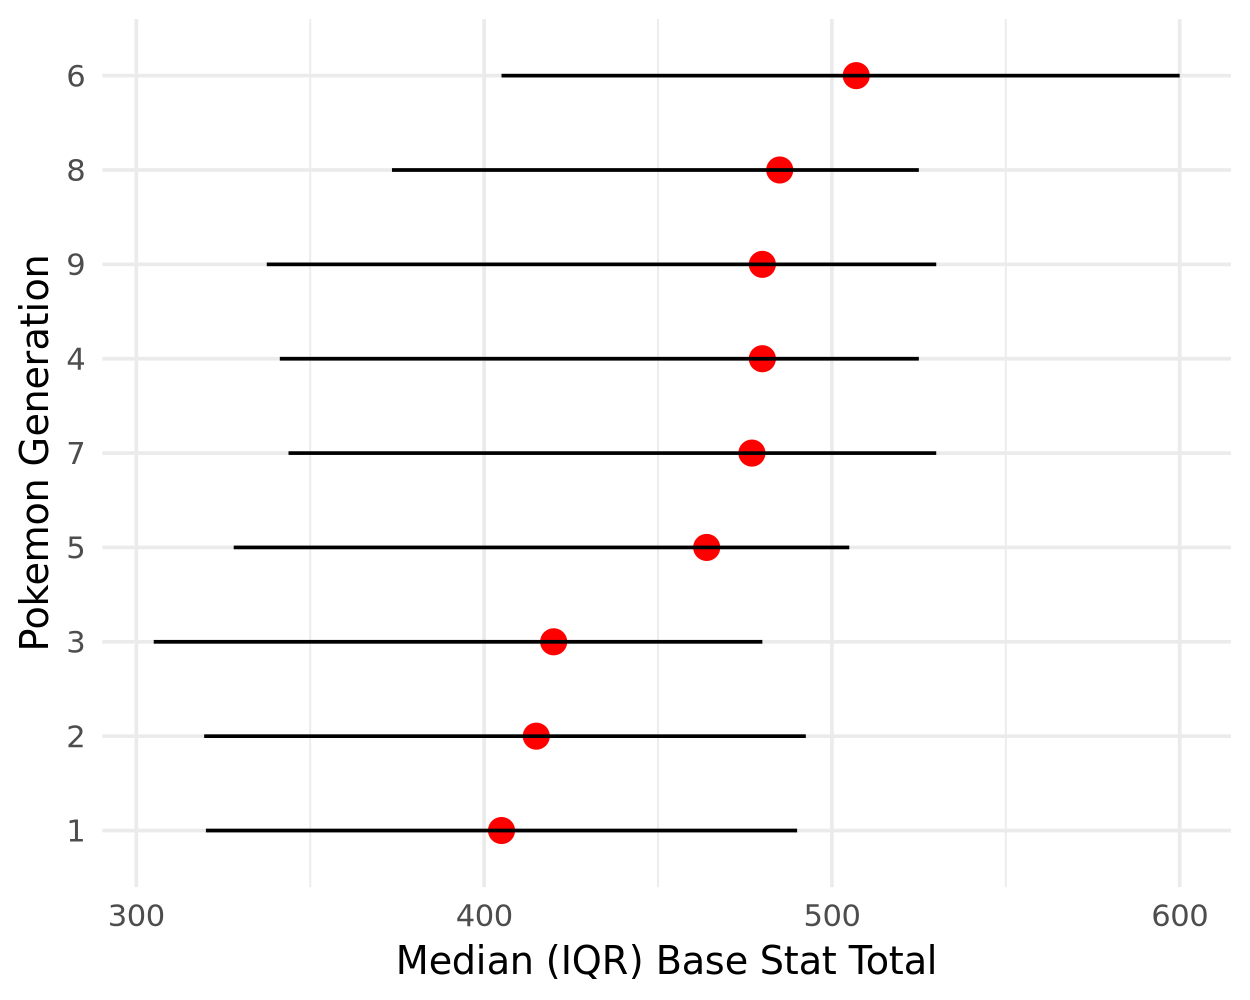

In [6]:
# Reset plot options
options(repr.plot.width = 5)

# Transform data, get summary stats per gen
vis3 <- pokemon |> 
    group_by(Generation) |>
    summarize(med = median(Total),
              q1 = quantile(Total, 0.25),
              q3 = quantile(Total, 0.75)) |>
    mutate(Generation = fct_reorder(as.character(Generation), med))

# Plot median (IQR) base stat total per gen, ordered by descending median
ggplot(vis3, aes(x = med, y = Generation)) + 
    geom_point(color = "red", size = 3) + 
    geom_segment(aes(x = q1, xend = q3)) + 
    theme_minimal() + 
    labs(y = "Pokemon Generation", x = "Median (IQR) Base Stat Total")

### Base Stats Findings

From the last visualization, we'll notice that Generations 1 - 3 appear particularly weak, not even containing the median base stat total for Generation 6 in their interquartile ranges. We also see that Generation 6 does appear to have that highest overall distribution of base stat total, with a median base stat total of all new Generation 6 Pokemon over 500. With both the typing and base stat findings showing that Generation 6 is expected to be ideal in both categories, we would conclude that Generation 6 is overall the strongest of the mainline Pokemon series games. So, if one is looking start building a competitive Pokemon team, they should probably consider using Generation 6 as a starting point. 

However, again note our limitations in type analysis & not factoring for evolution lines. Also, consider special case Pokemon introduced in later generations, such as 'Mega Evolutions' in Generation 6, or 'Area Zero' Pokemon in Generation 9. It is highly likely that we may be seeing Generation 6 portrayed with the strongest base stat total disribution when really that value is being inflated by the 'Mega Evolutions' who all have large base stat totals by default and is a subset of Pokemon that is not consistent or doesn't apply to all other generations. 